In [18]:
# Import pandas as pd
import pandas as pd

# Read training file
filepath = 'train.csv'
df = pd.read_csv(filepath)

# Print some observations
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [19]:
# Import NumPy as np
import numpy as np

# Remove training labels
y = df['Survived'].values

# Drop Some Unnecessary Columns
to_drop = ['Name', 'PassengerId', 'Survived', 'Ticket']
df = df.drop(to_drop, axis = 1)

# Preprocess Sex column
df['Sex'] = np.where(df['Sex'] == 'male', 0, 1)

# Print some observations
print(df.head())

   Pclass  Sex   Age  SibSp  Parch     Fare Cabin Embarked
0       3    0  22.0      1      0   7.2500   NaN        S
1       1    1  38.0      1      0  71.2833   C85        C
2       3    1  26.0      0      0   7.9250   NaN        S
3       1    1  35.0      1      0  53.1000  C123        S
4       3    0  35.0      0      0   8.0500   NaN        S


29.69911764705882


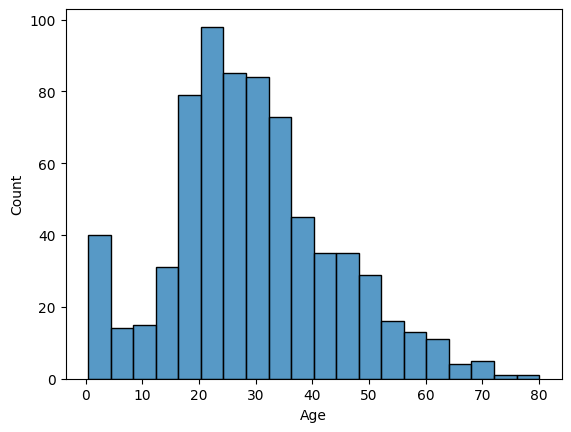

In [20]:
#
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df[df['Age'].notnull()]['Age'])

plt.savefig('C:/Users/user/Downloads/titanic_hist.png')

print(df[df['Age'].notnull()]['Age'].mean())

In [21]:
# Checking for Missing Values and DataTypes
print(df.info())

# Set Threshold for Dropping Missing Values
threshold = 0.30
missing_values = 1 - df.isna().sum() / df.shape[0]
to_drop1 = missing_values[missing_values < threshold].index
df = df.drop(to_drop1, axis = 1)

# Mode imputation for missing categorical data
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Mean imputation for missing age data
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Print some observations
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int32  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     204 non-null    object 
 7   Embarked  889 non-null    object 
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 52.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int32  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarke

In [22]:
# One-hot encoding
df_dummies = pd.get_dummies(df, columns = ['Embarked', 'Pclass'], drop_first = True)
df_dummies['Embarked_Q'] = df_dummies['Embarked_Q'].astype('int')
df_dummies['Embarked_S'] = df_dummies['Embarked_S'].astype('int')
df_dummies['Pclass_2'] = df_dummies['Pclass_2'].astype('int')
df_dummies['Pclass_3'] = df_dummies['Pclass_3'].astype('int')

# Print some observations
print(df_dummies.head())

   Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S  Pclass_2  \
0    0  22.0      1      0   7.2500           0           1         0   
1    1  38.0      1      0  71.2833           0           0         0   
2    1  26.0      0      0   7.9250           0           1         0   
3    1  35.0      1      0  53.1000           0           1         0   
4    0  35.0      0      0   8.0500           0           1         0   

   Pclass_3  
0         1  
1         0  
2         1  
3         0  
4         1  


                 Sex       Age     SibSp     Parch      Fare  Embarked_Q  \
Sex         1.000000 -0.084153  0.114631  0.245489  0.182333    0.074115   
Age        -0.084153  1.000000 -0.232625 -0.179191  0.091566   -0.013855   
SibSp       0.114631 -0.232625  1.000000  0.414838  0.159651   -0.026354   
Parch       0.245489 -0.179191  0.414838  1.000000  0.216225   -0.081228   
Fare        0.182333  0.091566  0.159651  0.216225  1.000000   -0.117216   
Embarked_Q  0.074115 -0.013855 -0.026354 -0.081228 -0.117216    1.000000   
Embarked_S -0.119224 -0.019336  0.068734  0.060814 -0.162184   -0.499421   
Pclass_2    0.064746  0.006589 -0.055932 -0.000734 -0.118557   -0.127301   
Pclass_3   -0.137143 -0.281004  0.092548  0.015790 -0.413333    0.237449   

            Embarked_S  Pclass_2  Pclass_3  
Sex          -0.119224  0.064746 -0.137143  
Age          -0.019336  0.006589 -0.281004  
SibSp         0.068734 -0.055932  0.092548  
Parch         0.060814 -0.000734  0.015790  
Fare         -

,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.352413,29.699118,0.523008,0.381594,32.204208,0.086420,0.725028,0.206510,0.551066
std,0.477990,13.002015,1.102743,0.806057,49.693429,0.281141,0.446751,0.405028,0.497665
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,1.000000
75%,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


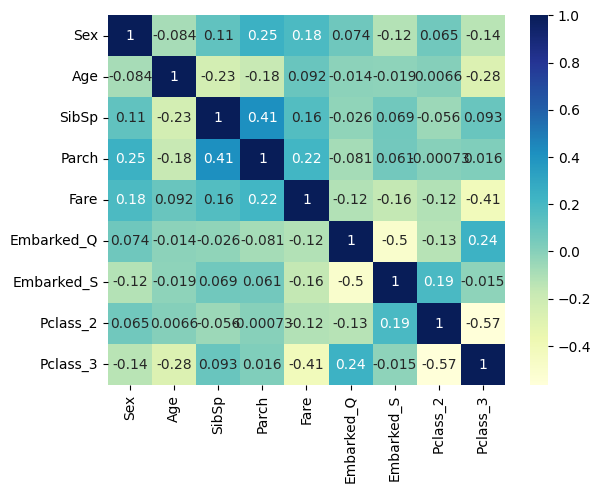

In [24]:
# Correlation matrix between features
print(df_dummies.corr())

corrheat = sns.heatmap(df_dummies.corr(), cmap="YlGnBu", annot=True)

plt.savefig('C:/Users/user/Downloads/titanic_heatmap.png')

df_dummies.describe()

In [25]:
# Import Necessary Functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Convert DataFrame to Numpy Array
X = df_dummies.to_numpy()

# Scale continuous variables
scaler = StandardScaler()
X_scale = np.copy(X)
X_scale[:, [1, 4]] = scaler.fit_transform(X[:, [1, 4]])

# Print array
print(X.shape)

(891, 9)


In [39]:
# Import sklearn
from sklearn.neighbors import KNeighborsClassifier

# Train, test, and splt
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, stratify = y, random_state = 2023)

# Binary classifier
knn = KNeighborsClassifier(n_neighbors = 8)

# Fit to model
knn.fit(X_train, y_train)

# Print score
print(knn.score(X_test, y_test))

0.757847533632287


In [40]:
# Import necessary packages
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score

# Parameters for randomized search cross-validation
params_knn = {
    'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 18, 20],
    'leaf_size': [6, 7, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20],
        }

folds = 10
param_comb = 2

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 2023)

random_search_knn = RandomizedSearchCV(knn, param_distributions=params_knn, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=2023)
random_search_knn.fit(X_train, y_train)

print(random_search_knn.best_params_)
print(random_search_knn.best_score_)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
{'n_neighbors': 14, 'leaf_size': 17}
0.8442556955239882


In [41]:
# Import logistic regression packages
from sklearn.linear_model import LogisticRegression

# Model
lr = LogisticRegression()

lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))

0.757847533632287


In [42]:
# Randomized search CV
params_lr = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

random_search_lr = RandomizedSearchCV(lr, param_distributions=params_lr, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001)
random_search_lr.fit(X_train, y_train)

print(random_search_lr.best_params_)
print(random_search_lr.best_score_)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
{'solver': 'liblinear', 'penalty': 'l1'}
0.8591282051282052


In [43]:
# Import xgboost
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Train, test, and splt
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

# XGB Classifier
xgbc = xgb.XGBClassifier()
xgbc.fit(X_train, y_train)

preds = xgbc.predict(X_test)
accuracy = accuracy_score(preds, y_test)

print(accuracy)

0.7488789237668162


In [44]:
# Randomized search CV
params_xgb = {
    'n_estimators': [50, 100, 200, 300, 400, 500, 600],
    'learning_rate': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05],
    'objective': ['binary:logistic', 'binary:logitsraw', 'binary:hinge'],
        'min_child_weight': [1, 3, 5, 8, 10],
        'gamma': [0.5, 1, 1.5, 2, 3, 4, 5],
        'subsample': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]
        }

param_comb_xgb = 8

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search_xgb = RandomizedSearchCV(xgbc, param_distributions=params_xgb, n_iter=param_comb_xgb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001)

random_search_xgb.fit(X_train, y_train)

print(random_search_xgb.best_params_)
print(random_search_xgb.best_score_)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
{'subsample': 0.9, 'objective': 'binary:logistic', 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.03, 'gamma': 2, 'colsample_bytree': 0.8}
0.8813491467881711


In [49]:
random_search.predict(X_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0])

In [60]:
# Read test file
filepath_test = 'test.csv'
df_test = pd.read_csv(filepath_test)

# Print some observations
print(df_test.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [61]:
# Separate for submission purposes
df_id = df_test['PassengerId']

# Drop Some Unnecessary Columns
to_drop = ['Name', 'PassengerId', 'Ticket', 'Cabin']
df_test = df_test.drop(to_drop, axis = 1)

# Preprocess Sex column
df_test['Sex'] = np.where(df_test['Sex'] == 'male', 0, 1)

# Print some observations
print(df_test.head())

   Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0       3    0  34.5      0      0   7.8292        Q
1       3    1  47.0      1      0   7.0000        S
2       2    0  62.0      0      0   9.6875        Q
3       3    0  27.0      0      0   8.6625        S
4       3    1  22.0      1      1  12.2875        S


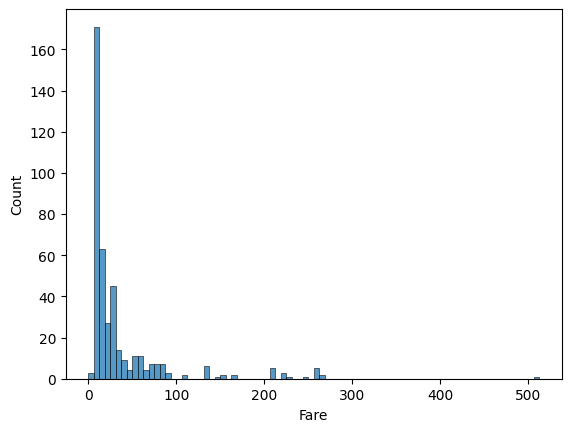

30.272590361445783


In [62]:
sns.histplot(df_test[df_test['Fare'].notnull()]['Fare'])

plt.savefig('C:/Users/user/Downloads/titanic_test_hist_fare.png')
plt.show()

print(df_test[df_test['Age'].notnull()]['Age'].mean())

In [63]:
# Checking for Missing Values and DataTypes
print(df_test.info())

# Mode imputation for missing categorical data
df_test['Embarked'] = df_test['Embarked'].fillna(df_test['Embarked'].mode()[0])

# Mean imputation for missing age data
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int32  
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int32(1), int64(3), object(1)
memory usage: 21.4+ KB
None


In [64]:
# One-hot encoding similar to training Set
df_test_dummies = pd.get_dummies(df_test, columns = ['Embarked', 'Pclass'], drop_first = True)
df_test_dummies['Embarked_Q'] = df_test_dummies['Embarked_Q'].astype('int')
df_test_dummies['Embarked_S'] = df_test_dummies['Embarked_S'].astype('int')
df_test_dummies['Pclass_2'] = df_test_dummies['Pclass_2'].astype('int')
df_test_dummies['Pclass_3'] = df_test_dummies['Pclass_3'].astype('int')

                 Sex       Age     SibSp     Parch      Fare  Embarked_Q  \
Sex         1.000000 -0.084153  0.114631  0.245489  0.182333    0.074115   
Age        -0.084153  1.000000 -0.232625 -0.179191  0.091566   -0.013855   
SibSp       0.114631 -0.232625  1.000000  0.414838  0.159651   -0.026354   
Parch       0.245489 -0.179191  0.414838  1.000000  0.216225   -0.081228   
Fare        0.182333  0.091566  0.159651  0.216225  1.000000   -0.117216   
Embarked_Q  0.074115 -0.013855 -0.026354 -0.081228 -0.117216    1.000000   
Embarked_S -0.119224 -0.019336  0.068734  0.060814 -0.162184   -0.499421   
Pclass_2    0.064746  0.006589 -0.055932 -0.000734 -0.118557   -0.127301   
Pclass_3   -0.137143 -0.281004  0.092548  0.015790 -0.413333    0.237449   

            Embarked_S  Pclass_2  Pclass_3  
Sex          -0.119224  0.064746 -0.137143  
Age          -0.019336  0.006589 -0.281004  
SibSp         0.068734 -0.055932  0.092548  
Parch         0.060814 -0.000734  0.015790  
Fare         -

,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.352413,29.699118,0.523008,0.381594,32.204208,0.086420,0.725028,0.206510,0.551066
std,0.477990,13.002015,1.102743,0.806057,49.693429,0.281141,0.446751,0.405028,0.497665
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,1.000000
75%,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


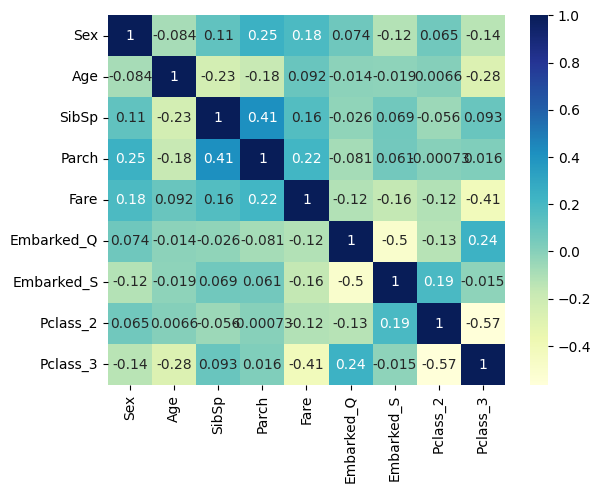

In [65]:
# Correlation matrix between features
print(df_dummies.corr())

corrheat = sns.heatmap(df_dummies.corr(), cmap="YlGnBu", annot=True)

plt.savefig('C:/Users/user/Downloads/titanic_test_heatmap.png')

df_dummies.describe()

In [66]:
# Convert Test DataFrame to Numpy Array
X_t = df_test_dummies.to_numpy()

# Scale continuous variables
scaler = StandardScaler()
X_t_scale = np.copy(X_t)
X_t_scale[:, [1, 4]] = scaler.fit_transform(X_t_scale[:, [1, 4]])

In [67]:
preds = xgbc.predict(X_t_scale)
print(preds)

[0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1
 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 0 0 1 1 0 1 0 0 0]


In [68]:
df_id.to_frame().merge(pd.DataFrame(preds, columns = ["Survived"]), left_index=True, right_index=True).to_csv('C:/Users/user/Downloads/gender_submission.csv', index = False)